###Import the necessary Functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


##Usefull Functions

In [ ]:

def cabin_estimator(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a



def sns_barplot(data,x,y):
  values = data[x].value_counts()
  sns.set(style="darkgrid")
  plt.subplots(figsize = (15,8))
  ax = sns.barplot(x = x, 
                  y = y, 
                  data=data, 
                  # palette = pal,
                  linewidth=5,
                  # order = ['female','male'],
                  capsize = .05,

                  )

  plt.title("{} vs {}".format(x,y), fontsize = 25,loc = 'center', pad = 40)
  plt.ylabel("{}".format(y), fontsize = 15, )
  plt.xlabel("{}".format(x),fontsize = 15)


In [ ]:
#@title Import the files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

In [ ]:
##this is importing from the library I have written
import DataVisualization as d

          Total   Percent
Cabin       687  0.771044
Age         177  0.198653
Embarked      2  0.002245
Fare          0  0.000000
Ticket        0  0.000000


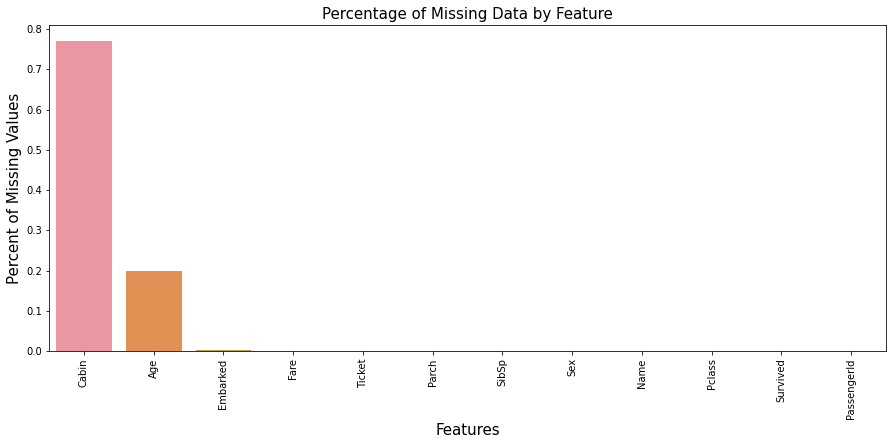

In [ ]:
##Function from the my Library
d.show_missing(train)

In [ ]:
#@title As we can see that Cabin has approximately 80 % missing values.We can fill the missing values but it may not be beneficial

In [ ]:

X = train.drop('Survived',axis=1)
y = train.Survived

In [ ]:
##We can see that Embarked Column has two missing values and both of them are females. Let's see from where most females embarked
X[X.Embarked.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


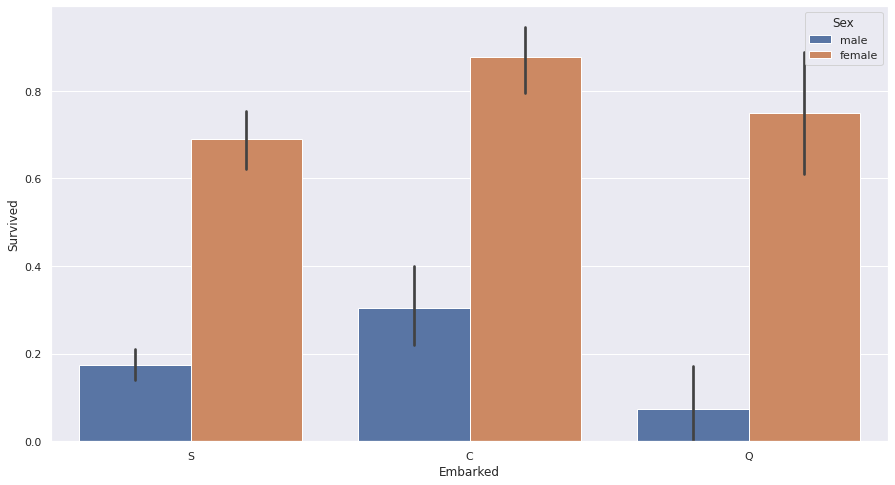

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='Embarked',y='Survived',data=train,hue='Sex')

In [ ]:
##Most females embarked from the C port,so let's fill the missing values with C
X.Embarked.fillna('C',inplace=True)

###Fill the Missing values of Cabin column

In [ ]:
X.Cabin.fillna('N',inplace=True)
X.Cabin = [i[0] for i in X.Cabin] 
X.Cabin.unique()
with_N = X[X.Cabin == "N"]
without_N = X[X.Cabin != "N"]
with_N['Cabin'] = with_N.Fare.apply(cabin_estimator)
X = pd.concat([with_N,without_N],axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


###Split the title from the  Name 


In [ ]:
X['Title'] = [i.split('.')[0].split(',')[1].strip(' ') for i in X.Name]

In [ ]:
X['Title'].unique()


array(['Mr', 'Miss', 'Master', 'Mrs', 'Don', 'Rev', 'Dr', 'Ms', 'Col',
       'Jonkheer', 'Mme', 'Major', 'Lady', 'Sir', 'Mlle', 'Capt',
       'the Countess'], dtype=object)

In [ ]:
X['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

###Drop the Name Column

In [ ]:
##We can remove the Name column because now it's not useful enough
X.drop('Name',inplace=True,axis=1)


In [ ]:
##Drop the Ticket Column as well
X.drop('Ticket',inplace=True,axis=1)


In [ ]:
##select all the object and numeric columns
objects = list(X.select_dtypes(include='O'))
nums = list(X.select_dtypes(exclude='O'))


In [ ]:
x_id = X.PassengerId

In [ ]:
X.drop('PassengerId',axis=1,inplace=True)

In [ ]:
X = pd.get_dummies(X,columns=objects)

In [ ]:
train = pd.concat([X,y],axis=1)

In [ ]:
## Implementing the age_estimator function in both train and test dataset. 
X = age_estimator(X,"Age")


In [ ]:
##Now we have no missing values in the train set
train['Age'].isnull().sum().any()

False

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
import seaborn as sns
from matplotlib import rcParams
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection

In [ ]:
X=train.drop('Survived',axis=1)

In [ ]:
y = train.Survived

In [ ]:
X.drop('Title_the Countess',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray

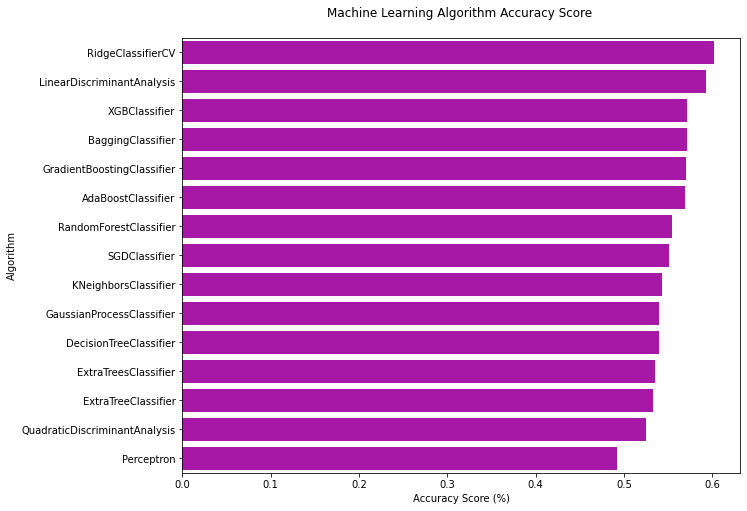

In [ ]:
##this is the function i have written
mla = CompareMLA(X,y)

In [ ]:
mla[0]

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
6,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.620037,0.601866,0.0296378,0.0078124
12,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.618914,0.592537,0.0360302,0.00611932
14,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.74382,0.571269,0.094515,0.0607669
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.926592,0.571269,0.0706998,0.0283658
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.785206,0.570522,0.107655,0.107834
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.674906,0.568657,0.0599064,0.0801484
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.955618,0.554104,0.0793514,0.17276
7,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_wei...",0.547191,0.550746,0.205263,0.00480917
9,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.7,0.543284,0.0523134,0.00345888
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.90618,0.539925,0.0639237,0.270649


In [ ]:
mla[1]

{'AdaBoostClassifier': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=None),
 'BaggingClassifier': BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                   max_features=1.0, max_samples=1.0, n_estimators=10,
                   n_jobs=None, oob_score=False, random_state=None, verbose=0,
                   warm_start=False),
 'DecisionTreeClassifier': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'ExtraTreeClassifier': ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='

In [ ]:
MLA = mla[0]

In [ ]:
MLA.to_csv('MLA')

In [ ]:
MLA

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.921348,0.835075,0.0678694,0.106419
14,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.900936,0.829478,0.0735832,0.0553946
12,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.83221,0.825,0.0518925,0.00626478
6,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.830337,0.822761,0.0503731,0.00615647
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.852247,0.820149,0.0800667,0.0837117
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.995318,0.819776,0.0667994,0.153609
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.979401,0.818284,0.0482903,0.0254216
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.995318,0.804104,0.071895,0.121863
10,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.995318,0.792164,0.0527546,0.00315113
11,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.995318,0.773134,0.0684211,0.00211442


In [ ]:
algs = mla[1]

In [ ]:
len(list(X))

23

In [ ]:
len(list(test))

23

###So, we have achieved more that 85% on train set. Let's check on the test set

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


          Total   Percent
Cabin       327  0.782297
Age          86  0.205742
Fare          1  0.002392
Embarked      0  0.000000
Ticket        0  0.000000


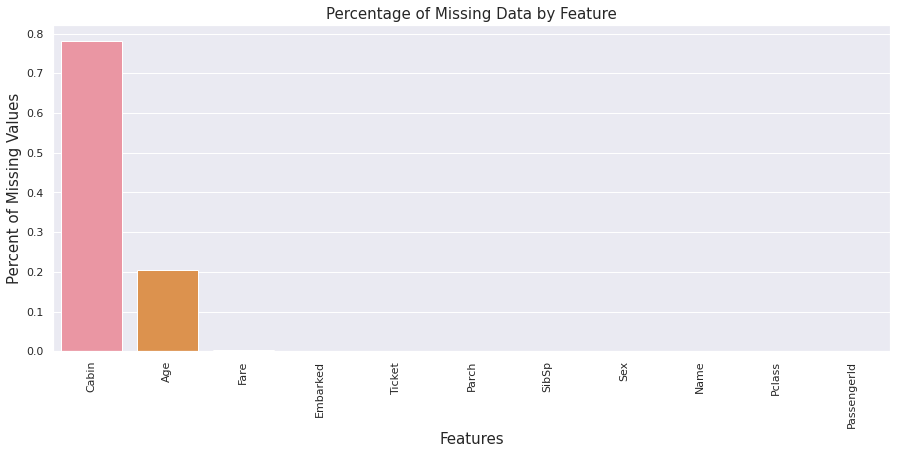

In [ ]:
d.show_missing(test)

In [ ]:
##We repeat the same process

In [ ]:
test['Age'].isnull().sum()

86

In [ ]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Col,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
0,892,3,34.5,0,0,7.8292,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,894,2,62.0,0,0,9.6875,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
4,896,3,22.0,1,1,12.2875,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
test[test.Fare.isnull()]

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other


In [ ]:
def age_estimator(df,X,rfr = RandomForestRegressor(n_estimators=1500,n_jobs=-1)):
  # specific_df = df.loc[:,X:]
  temp_train = df[df[X].notnull()]
  temp_test = df[df[X].isnull()]

  y = temp_train[X].values
  X_col = temp_train.drop(X,axis=1)
  X_col = X_col.values
  
  rfr.fit(X_col,y)
  predicted = rfr.predict(temp_test.drop(X,axis=1))
  df.loc[df.Age.isnull(),X] =predicted
  return df

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 414
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Age           332 non-null    float64
 3   SibSp         418 non-null    int64  
 4   Parch         418 non-null    int64  
 5   Fare          417 non-null    float64
 6   Sex_female    418 non-null    uint8  
 7   Sex_male      418 non-null    uint8  
 8   Cabin_A       418 non-null    uint8  
 9   Cabin_B       418 non-null    uint8  
 10  Cabin_C       418 non-null    uint8  
 11  Cabin_D       418 non-null    uint8  
 12  Cabin_E       418 non-null    uint8  
 13  Cabin_F       418 non-null    uint8  
 14  Cabin_G       418 non-null    uint8  
 15  Cabin_T       418 non-null    uint8  
 16  Embarked_C    418 non-null    uint8  
 17  Embarked_Q    418 non-null    uint8  
 18  Embarked_S    418 non-null    

             Total  Percent
Title_Other      0      0.0
Cabin_D          0      0.0
Age              0      0.0
SibSp            0      0.0
Parch            0      0.0


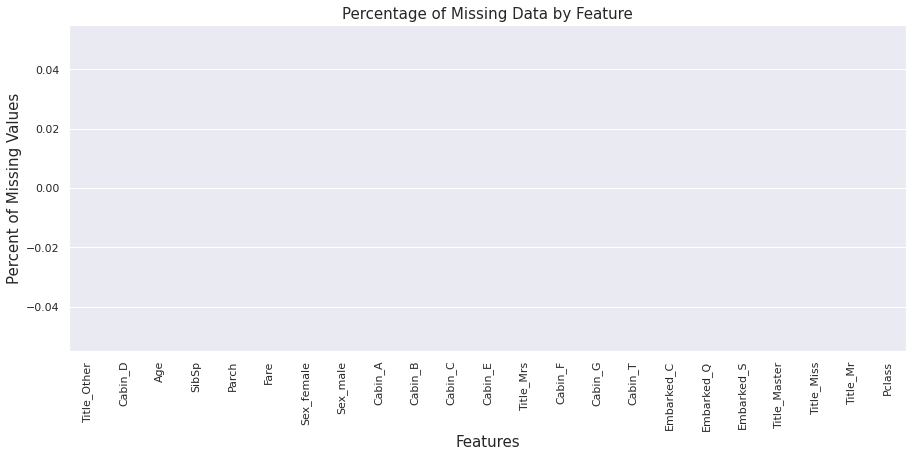

In [ ]:
d.show_missing(test)

In [ ]:
# test['Title'].unique()

In [ ]:
train.to_csv('TitanicTrain.csv')
test.to_csv('TitanicTest.csv')

In [ ]:
len(list(X)),len(list(test))

(24, 23)

In [ ]:
mla

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.933521,0.825373,0.0579068,0.124253
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1,0.825,0.0645867,0.162025
14,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.908052,0.824254,0.0582627,0.0605721
12,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.832584,0.823507,0.042787,0.00697033
6,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.832397,0.819776,0.0472409,0.00627682
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.980337,0.814925,0.0527903,0.0268074
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.859738,0.813433,0.0772307,0.0850118
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",1,0.811194,0.0609432,0.126016
10,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1,0.780224,0.0576139,0.00369518
11,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1,0.757836,0.0651662,0.00232673


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
gb = GradientBoostingClassifier()
rfc = RandomForestClassifier()
xgb = XGBClassifier()
dtc = ensemble.BaggingClassifier()
extratrees = ensemble.ExtraTreesClassifier()
lr = LogisticRegression()

In [ ]:
reg = [gb,rfc,xgb,dtc,extratrees,lr]

In [ ]:
def featureImportance(model,x,tree =False,clf=False,reg=False):
  feature_importances = pd.DataFrame(columns = ['Variable', 'Coef'])
  feature_importances['Variable'] = list(x)
  if tree == True or xgb == True:
    feature_importances['Coef'] = abs(model.feature_importances_)
  if clf == True:
    feature_importances['Coef'] = abs(model.coef_[0])
  if reg == True:
    feature_importances['Coef'] = abs(model.coef_)
    

  feature_importances.sort_values(by = 'Coef', ascending = False, inplace = True)
  feature_importances = feature_importances[0:15]
  f, ax = plt.subplots(figsize=(12, 10))
  plt.xticks(rotation='90')
  sns.barplot(x=feature_importances['Variable'], y = feature_importances['Coef'])
  plt.xlabel('Features', fontsize=15)
  plt.ylabel('Importance', fontsize=15)
  plt.title('Most Important Features in Lasso Model', fontsize=15)
  return feature_importances

,Variable,Coef
21,Title_Mr,0.456642
5,Fare,0.154019
1,Pclass,0.146483
2,Age,0.071511
0,PassengerId,0.066119
23,Title_Other,0.041207
3,SibSp,0.014620
12,Cabin_E,0.010838
18,Embarked_S,0.010117
11,Cabin_D,0.005261


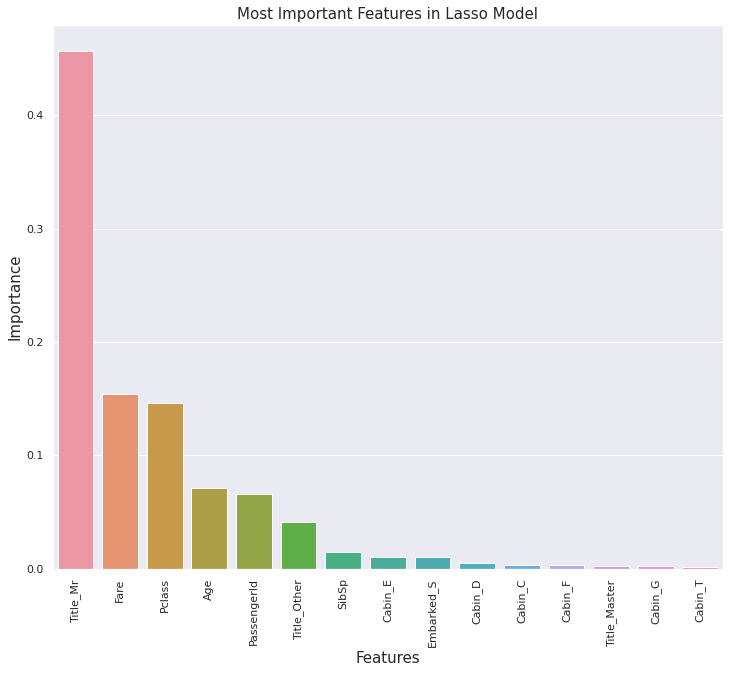

In [ ]:
featureImportance(algs['GradientBoostingClassifier'],X)

,Variable,Coef
21,Title_Mr,0.486956
1,Pclass,0.106024
23,Title_Other,0.079675
10,Cabin_C,0.031075
5,Fare,0.030348
18,Embarked_S,0.029080
19,Title_Master,0.024979
12,Cabin_E,0.022354
16,Embarked_C,0.021239
14,Cabin_G,0.021090


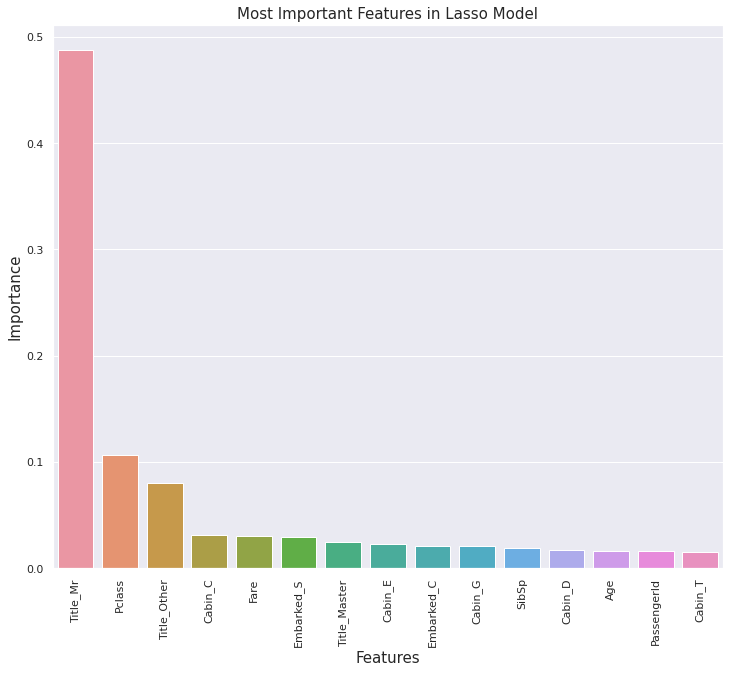

In [ ]:
featureImportance(algs['XGBClassifier'],X,tree=True)

In [ ]:
algs

{'AdaBoostClassifier': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=None),
 'BaggingClassifier': BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                   max_features=1.0, max_samples=1.0, n_estimators=10,
                   n_jobs=None, oob_score=False, random_state=None, verbose=0,
                   warm_start=False),
 'DecisionTreeClassifier': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'ExtraTreeClassifier': ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='

In [ ]:
def stack_predictions(algs,test):
  dict1 = {}
  for name,alg in algs.items():
    dict1[name] = algs[name].predict(test)
  return dict1


In [ ]:
algs['ExtraTreeClassifier'].predict(test.values)

In [ ]:
predictions = stack_predictions(algs,test)

In [ ]:
predictions['ExtraTreeClassifier']

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [ ]:
com_pred = stack_predictions(algs,test)

In [ ]:
!pip install mlens

     |████████████████████████████████| 235kB 5.7MB/s 


In [ ]:
from mlens.visualization import corrmat

[MLENS] backend: threading


In [ ]:
def show_relation_algs(predictions):
  dict1 = {}
  for name,alg in predictions.items():
    dict1[name] = alg.ravel()
  predictions = pd.DataFrame(dict1)
  corrmat(predictions.corr())
  plt.show


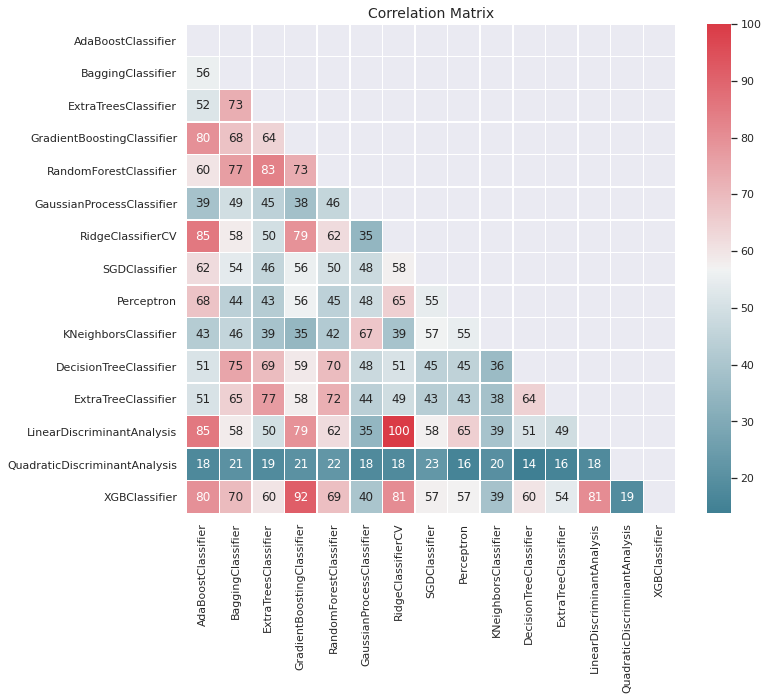

In [ ]:
show_relation_algs(predictions)

In [ ]:
y_pred = algs['XGBClassifier'].predict(X)

In [ ]:
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y,y_pred)

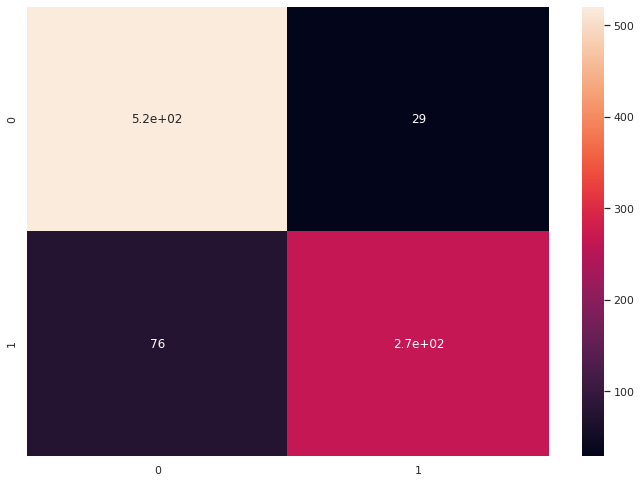

In [ ]:
sns.heatmap(cnf,annot=True)

In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
pre =predictions['BaggingClassifier']

In [ ]:
submissions = pd.DataFrame({'PassengerId':test_id,'Survived':pre})

In [ ]:
predictions['ExtraTreeClassifier']

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [ ]:
submissions.shape

(418, 2)

In [ ]:
submission.shape

(418, 2)

In [ ]:
submissions.to_csv('Submission.csv',index=False)